# Tutorial to make plots using journal_styles

journal_styles requires an installation procedure. Please refer to the readme file.

## Importing modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import journal_styles as js

In [2]:
dir(js)

['Figure_Frame',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'constants',
 'figure_frame',
 'figures',
 'journals',
 'parameters']

## Set output folder
Set the folder for our example plots.

In [3]:
example_folder = "./example_plots"
if not os.path.exists(example_folder):
            os.makedirs(example_folder)

## First plot
Let's load the attached two colums data file and just plot it.

This is how the default plot style looks like. Parameters are optimized for Physical Review family journals

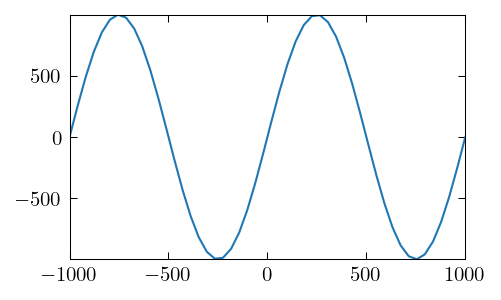

In [4]:
data = np.loadtxt("data.txt")
plt.plot(data[:, 0], data[:, 1])

## Explore available styles
Just make a list of available journals styles.
Then make a complete list of all the plotting style available (including the default ones from matplotlib). If the package is correctly installed the first list should be included in the second.

In [5]:
print("journal styles")
for journal in js.journals:
    print("\t", journal)
print("available styles")
for style in plt.style.available:
    print("\t", style)

journal styles
	 PR
	 Nature
	 Science
	 Nature_Comm
available styles
	 Nature
	 Nature_Comm
	 PR
	 Science
	 Solarize_Light2
	 _classic_test_patch
	 _mpl-gallery
	 _mpl-gallery-nogrid
	 bmh
	 classic
	 dark_background
	 fast
	 fivethirtyeight
	 ggplot
	 grayscale
	 seaborn-v0_8
	 seaborn-v0_8-bright
	 seaborn-v0_8-colorblind
	 seaborn-v0_8-dark
	 seaborn-v0_8-dark-palette
	 seaborn-v0_8-darkgrid
	 seaborn-v0_8-deep
	 seaborn-v0_8-muted
	 seaborn-v0_8-notebook
	 seaborn-v0_8-paper
	 seaborn-v0_8-pastel
	 seaborn-v0_8-poster
	 seaborn-v0_8-talk
	 seaborn-v0_8-ticks
	 seaborn-v0_8-white
	 seaborn-v0_8-whitegrid
	 tableau-colorblind10


## Plot with different journal style
Here we repeat the same plot as before but changing the journal setting through te context manager.
We add axis labels and save each plot.
Styles are defined to fit the journals columns exactly and leave enough space for labels and numbers up to 4 digits.

PR
Nature
Science
Nature_Comm


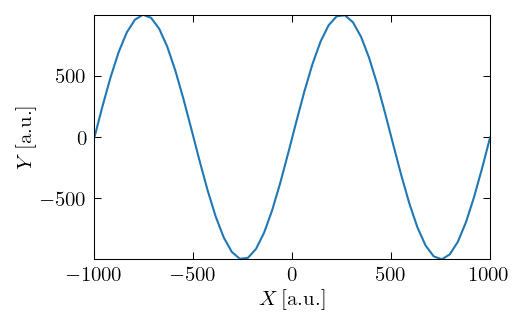

In [6]:
for journal in js.journals:
    with plt.style.context(journal):
        print(journal)
        plt.figure()
        plt.plot(data[:, 0], data[:, 1])
        plt.xlabel(r"$X\, [{\rm a.u.}]$")
        plt.ylabel(r"$Y\, [{\rm a.u.}]$")
        plt.savefig(example_folder + "/1D{}.pdf".format(journal))

## First use of figure_frame
We want to add a title to our plot. Since the figure is too tight we must add extra space on top.
To manage this we have a function figure_frame()  that returns the size of the figure and the rectangle for the axis.

The first two arguments of the function are the horizontal and vertical subdivision of the figure.
These are in the form of strings containing 's' (small space), 'l' (large space), 'h' (half small space), 'H' (half large space), and 'M' (position of the main axes).
In the following example we have a large space, the main axes and a small space in the horizontal direction (left to right), and a large space, the main axes and half a large space (for the title) in the vertical direction (bottom to top).

The previous figures could have been obtained whith 'lMs', 'lMs'.

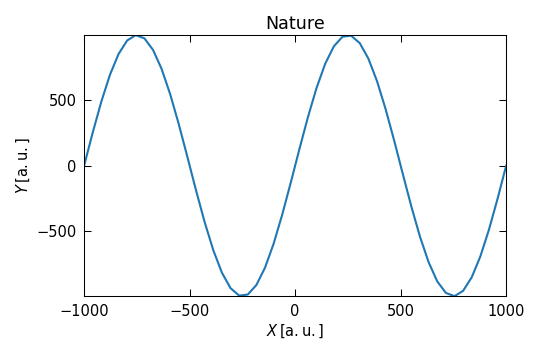

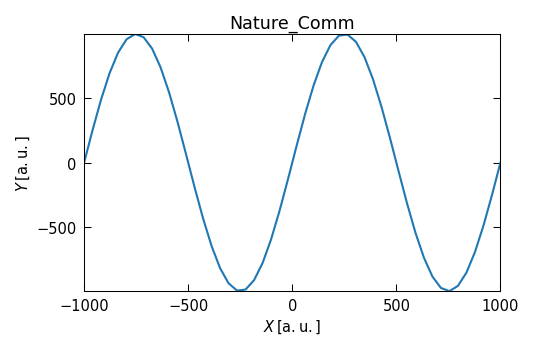

In [7]:
for journal in js.journals:
    with plt.style.context(journal):
        ff = js.figure_frame("lMs", "lMH", journal=journal)
        plt.figure(figsize=ff.figsize)
        plt.axes(ff.rects[0])
        plt.title("{}".format(journal))
        plt.plot(data[:, 0], data[:, 1])
        plt.xlabel(r"$X\, [{\rm a.u.}]$")
        plt.ylabel(r"$Y\, [{\rm a.u.}]$")
        plt.savefig(example_folder + "/1D{}_with_title.pdf".format(journal))

## Adding secondary axis
Here we want to add a two secondary axes. For this we need a large space in the horizontal direction and a large space in the vertical one, plus the half large space for the title. 

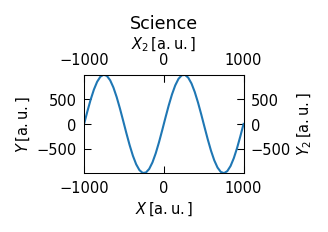

In [8]:
for journal in js.journals:
    with plt.style.context(journal):
        ff = js.figure_frame("lMl", "lMlH", journal=journal)
        plt.figure(figsize=ff.figsize)
        ax = plt.axes(ff.rects[0])
        plt.title("{}".format(journal))
        plt.plot(data[:, 0], data[:, 1])
        plt.xlabel(r"$X\, [{\rm a.u.}]$")
        plt.ylabel(r"$Y\, [{\rm a.u.}]$")
        secy = ax.secondary_yaxis("right")
        secy.set_ylabel(r"$Y_2\, [{\rm a.u.}]$")
        secx = ax.secondary_xaxis("top")
        secx.set_xlabel(r"$X_2\, [{\rm a.u.}]$")
        plt.savefig(example_folder + "/1D{}_with_secondary_axis.pdf".format(journal))

## Multipanel figures
The keyword 'M' can be used more than one time to produce different copies of the principal axes

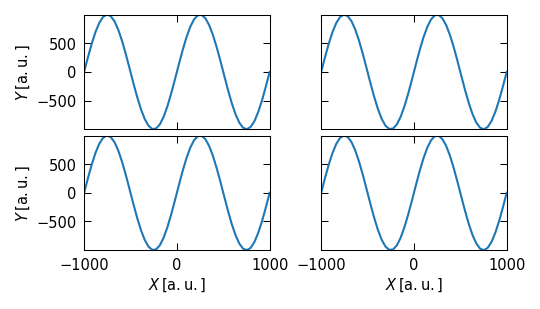

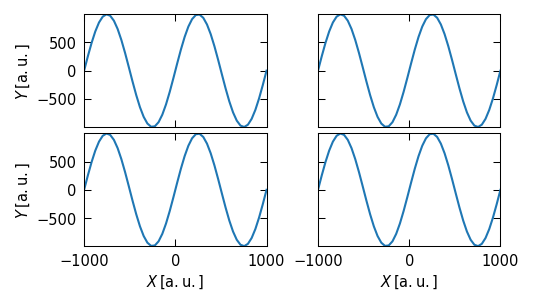

In [9]:
for journal in js.journals:
    with plt.style.context(journal):
        ff = js.figure_frame("lMHhMs", "lMhMs", journal=journal)
        plt.figure(figsize=ff.figsize)
        for i in range(4):
            ax = plt.axes(ff.rects[i])
            plt.plot(data[:, 0], data[:, 1])
            if i in [0, 1]:
                ax.set_xlabel(r"$X\, [{\rm a.u.}]$")
            else:
                ax.set_xticklabels([])
            if i in [0, 2]:
                plt.ylabel(r"$Y\, [{\rm a.u.}]$")
            else:
                ax.set_yticklabels([])
        plt.savefig(example_folder + "/1D{}double_plot.pdf".format(journal))

## Example of colorplot
In this example we load a matrix of 2D data and make a colorplot.
We will need space for the colorbar, so e ill use all the options of the function figure_frame().
in the horizontal direction we need a large space for the y label, the main axes, a half-small space between the axes and the colorbar, a half-small space for the colorbar, and a large space for its label.

We also need the function to return the rectangle for the colorbar axes.
This is done by setting the parameter additional_axes [(3,1)]  (fourth rectangle in horizontal direction and second in vertical direction, the low left corner being (0,0).
In the output the rectangle for the colorbar will be in ff['rects'][1].

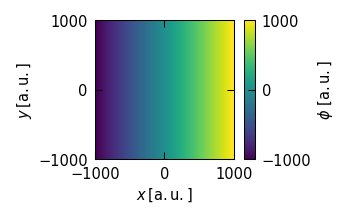

In [10]:
a = np.loadtxt("data2d.txt")
for journal in js.journals:
    ff = js.figure_frame(
        "lMhhl",
        "lMs",
        aspect_ratio=1.0,
        journal=journal,
        column="onecolumn",
        additional_axes=[(3, 1)],
    )
    with plt.style.context(journal):
        plt.figure(figsize=ff.figsize)
        ax = plt.axes(ff.rects[0])
        p1 = plt.imshow(a, extent=(-1e3, 1e3, -1e3, 1e3))
        plt.xlabel(r"$x\, [{\rm a.u.}]$")
        plt.ylabel(r"$y\, [{\rm a.u.}]$")
        plt.ylim(-1e3, 1e3)
        plt.xlim(-1e3, 1e3)
        cax = plt.axes(ff.rects[1])
        cbar = plt.colorbar(mappable=p1, cax=cax)
        cbar.set_label(r"$\phi~[{\rm a. u.}]$")
        plt.savefig(example_folder + "/test_2D{}.pdf".format(journal))

## Horizontal colorbar
Here we plot the same but with an horizontal colorbar and no space between the plot and the colorbar.

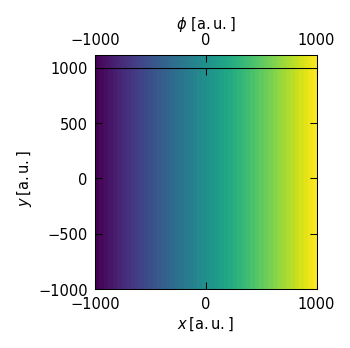

In [11]:
a = np.loadtxt("data2d.txt")
journal = "Science"
ff = js.figure_frame(
    "lMs",
    "lMsl",
    aspect_ratio=1.0,
    journal=journal,
    column="onecolumn",
    additional_axes=[(1, 2)],
)

with plt.style.context(journal):
    plt.figure(figsize=ff.figsize)
    ax = plt.axes(ff.rects[0])
    p1 = plt.imshow(a, extent=(-1e3, 1e3, -1e3, 1e3))
    plt.xlabel(r"$x\, [{\rm a.u.}]$")
    plt.ylabel(r"$y\, [{\rm a.u.}]$")
    plt.ylim(-1e3, 1e3)
    plt.xlim(-1e3, 1e3)
    cax = plt.axes(ff.rects[1])

    cbar = plt.colorbar(mappable=p1, cax=cax, orientation="horizontal")
    cbar.set_label(r"$\phi~[{\rm a. u.}]$")
    cax.xaxis.set_label_position("top")
    cax.xaxis.set_ticks_position("top")
    plt.savefig(example_folder + "/test_2D_horizontal{}.pdf".format(journal))